## Forecasting the Outcome of Future Space Missions Using Machine Learning

### LIBRARIES

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

# ML lib
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Boosting algorithms
import xgboost as xgb
import catboost as catboost

# For scaling 
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Evaluating
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

# warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [134]:
#Importing the dataset
data = pd.read_excel(r"C:\\Users\\KARTHIK\\SET\\MDataset4.xlsx",engine='openpyxl')

In [135]:
data.head()

,Year,Origin,Name,Motive,Status,Failure reason
0,1996.0,Argentina,SAC-B,Earth,Failure,Launch Failure
1,1997.0,Argentina,Nahuel 1A,Earth,Success,Nil
2,2000.0,Argentina,SAC-C,Earth,Success,Nil
3,1998.0,Argentina,SAC-A,Earth,Success,Nil
4,2011.0,Argentina,SAC-D,Earth,Success,Nil


In [136]:
data.shape

(618, 6)

In [137]:
data.index

RangeIndex(start=0, stop=618, step=1)

In [138]:
data.columns

Index(['Year', 'Origin', 'Name', 'Motive', 'Status', 'Failure reason '], dtype='object')

### Data Preprocessing

In [139]:
data.isna().sum()

Year               14
Origin              4
Name                4
Motive              4
Status              4
Failure reason      4
dtype: int64

In [140]:
# Count number of missing values in each row
missing_counts = data.isnull().sum(axis=1)

# Filter out rows with 4 or more missing values out of 6 columns
data = data[missing_counts < 4]

In [141]:
data.isnull().sum()

Year               10
Origin              0
Name                0
Motive              0
Status              0
Failure reason      0
dtype: int64

In [142]:
data.head()

,Year,Origin,Name,Motive,Status,Failure reason
0,1996.0,Argentina,SAC-B,Earth,Failure,Launch Failure
1,1997.0,Argentina,Nahuel 1A,Earth,Success,Nil
2,2000.0,Argentina,SAC-C,Earth,Success,Nil
3,1998.0,Argentina,SAC-A,Earth,Success,Nil
4,2011.0,Argentina,SAC-D,Earth,Success,Nil


In [143]:
print(data.isnull().sum())  # Check for NaN
print(np.isinf(data['Year']).sum()) 

Year               10
Origin              0
Name                0
Motive              0
Status              0
Failure reason      0
dtype: int64
0


In [144]:
# Handleing missingness in year column

data['Year'].fillna(0, inplace=True)

def fill_missing(group):
    mode_value = group.mode()[0] if not group.mode().empty else None
    return group.fillna(mode_value)

data['Year'] = data.groupby(['Origin', 'Name', 'Motive'])['Year'].transform(fill_missing)

print(data)

       Year     Origin        Name              Motive   Status  \
0    1996.0  Argentina       SAC-B               Earth  Failure   
1    1997.0  Argentina   Nahuel 1A               Earth  Success   
2    2000.0  Argentina       SAC-C               Earth  Success   
3    1998.0  Argentina       SAC-A               Earth  Success   
4    2011.0  Argentina       SAC-D               Earth  Success   
..      ...        ...         ...                 ...      ...   
609  1990.0      China  Fengyun 1B                 Sun  Failure   
610  2004.0      China  Fengyun 2B      Geostationary   Failure   
611  1997.0      China  Fengyun 2A      Geostationary   Failure   
612  2017.0      China  Shijian-18  Tele-communication  Failure   
613  2016.0      China  Shijian 10                Moon  Failure   

    Failure reason   
0    Launch Failure  
1               Nil  
2               Nil  
3               Nil  
4               Nil  
..              ...  
609  Launch Failure  
610  Launch Failure

In [145]:
data.isnull().sum()

Year               0
Origin             0
Name               0
Motive             0
Status             0
Failure reason     0
dtype: int64

In [146]:
data.describe()

,Year
count,614.000000
mean,1966.285016
std,254.059617
min,0.000000
25%,1978.000000
50%,2007.000000
75%,2016.000000
max,2023.000000


In [147]:
data.head()

,Year,Origin,Name,Motive,Status,Failure reason
0,1996.0,Argentina,SAC-B,Earth,Failure,Launch Failure
1,1997.0,Argentina,Nahuel 1A,Earth,Success,Nil
2,2000.0,Argentina,SAC-C,Earth,Success,Nil
3,1998.0,Argentina,SAC-A,Earth,Success,Nil
4,2011.0,Argentina,SAC-D,Earth,Success,Nil


### Exploratory Data Analysis

In [148]:
# All the countries

mission_by_country=data['Origin'].value_counts()
print(mission_by_country)

China             170
USA               137
India             125
Soviet Union       48
European Union     24
Japan              23
UK                 12
France             11
Turkey             10
Canada             10
Germany             6
Argentina           5
Iran                3
Italy               3
Poland              3
Mexico              2
Nigeria             2
Brazil              2
Israel              2
North Korea         2
Czechoslovakia      1
Egypt               1
Singapore           1
UAE                 1
Australia           1
Estonia             1
Lithuania           1
Indonesia           1
South Korea         1
Ethiopia            1
Bulgaria            1
Netherlands         1
Ecuador             1
Ukraine             1
Name: Origin, dtype: int64


In [149]:
# selecting only the top countries (Minimum 10 missions)

Top_country=mission_by_country[mission_by_country>=10]
print(Top_country)

China             170
USA               137
India             125
Soviet Union       48
European Union     24
Japan              23
UK                 12
France             11
Turkey             10
Canada             10
Name: Origin, dtype: int64


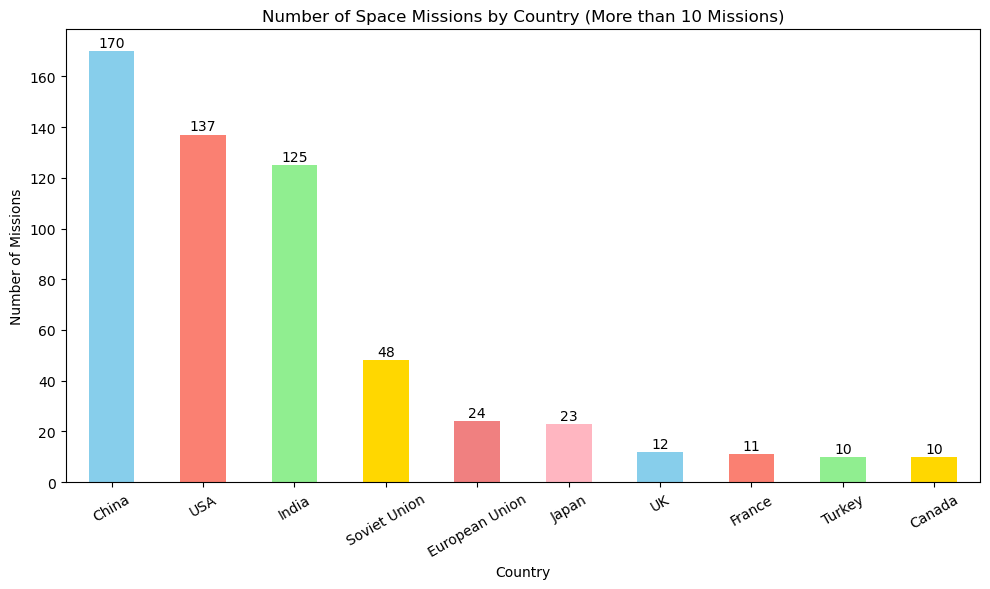

In [150]:
# visual 1 -> Top 10 country with highest missions

color_list=['skyblue','salmon','lightgreen','gold','lightcoral','lightpink']
plt.figure(figsize=(10,6))
Top_country.plot(kind='bar',color=color_list)

plt.title('Number of Space Missions by Country (More than 10 Missions)')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.xticks(rotation=30)
for index, value in enumerate(Top_country):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Filtering data  -> countries with more than or equals to 10 missions

In [151]:
mission_by_country = data['Origin'].value_counts()

countries_more_than_9_missions = mission_by_country[mission_by_country >= 10]

filtered_data = data[data['Origin'].isin(countries_more_than_9_missions.index)]

filtered_data

,Year,Origin,Name,Motive,Status,Failure reason
9,1962.0,Canada,Alouette 1,Earth,Success,Nil
10,1965.0,Canada,Alouette 2,Earth,Success,Nil
11,1969.0,Canada,ISIS 1,Earth,Success,Nil
12,1971.0,Canada,ISIS 2,Earth,Success,Nil
13,2003.0,Canada,MOST,Earth,Success,Nil
...,...,...,...,...,...,...
609,1990.0,China,Fengyun 1B,Sun,Failure,Launch Failure
610,2004.0,China,Fengyun 2B,Geostationary,Failure,Launch Failure
611,1997.0,China,Fengyun 2A,Geostationary,Failure,Launch Failure
612,2017.0,China,Shijian-18,Tele-communication,Failure,Launch Failure


### Successful Missions

In [152]:
missions_by_country = filtered_data['Origin'].value_counts()
top_countries = missions_by_country.head(10).index.tolist()
filtered2 = filtered_data[(filtered_data['Status'] == 'Success') & filtered_data['Origin'].isin(top_countries)]
success_by_country = filtered2['Origin'].value_counts()

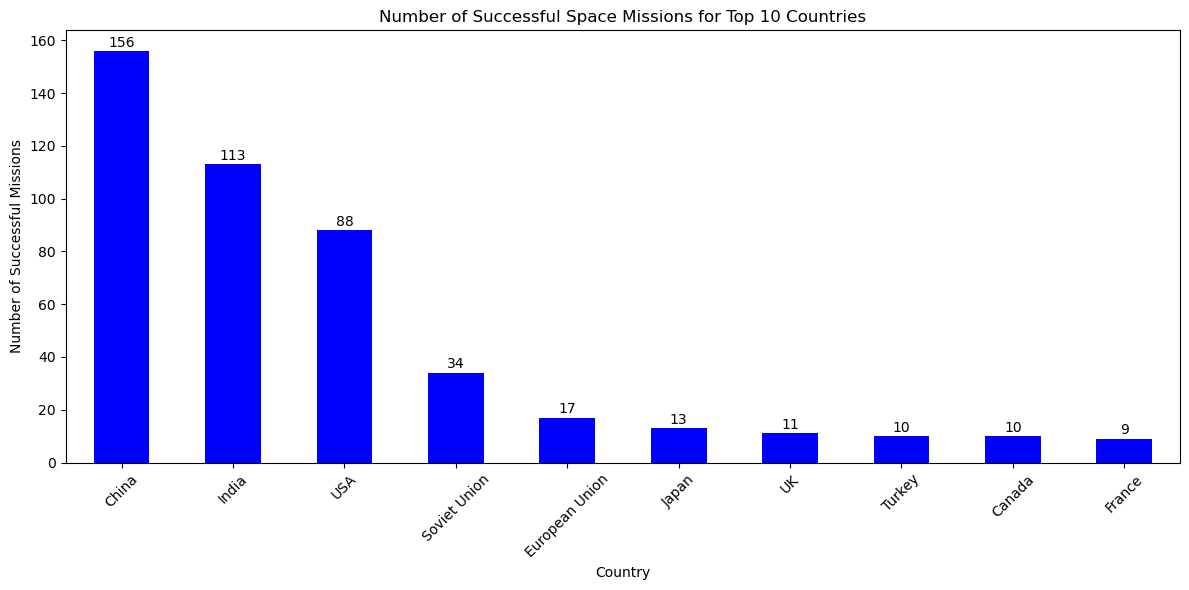

In [153]:
plt.figure(figsize=(12, 6))
success_by_country.plot(kind='bar', color='blue')
plt.title('Number of Successful Space Missions for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Successful Missions')
for index, value in enumerate(success_by_country):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Failure Missions

In [154]:
missions_by_country = filtered_data['Origin'].value_counts()
top_countries = missions_by_country.head(10).index.tolist()
top_countries

['China',
 'USA',
 'India',
 'Soviet Union',
 'European Union',
 'Japan',
 'UK',
 'France',
 'Turkey',
 'Canada']

In [155]:
filtered2 = filtered_data[(filtered_data['Status'] == 'Failure')& filtered_data['Origin'].isin(top_countries)]
failure_by_country = filtered2['Origin'].value_counts()

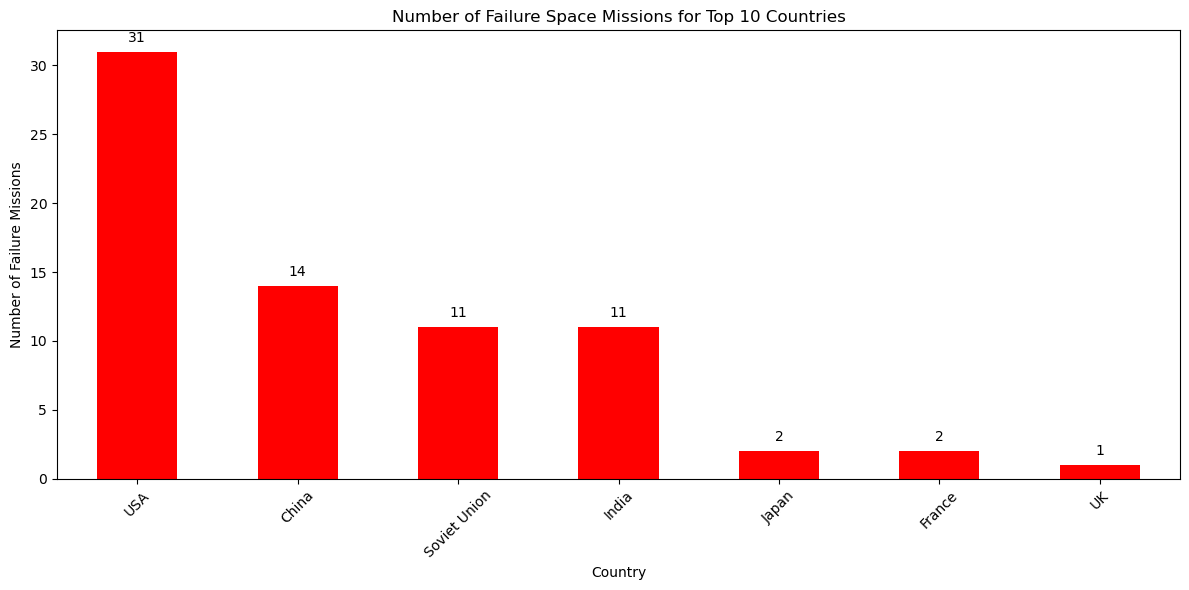

In [156]:
plt.figure(figsize=(12, 6))
failure_by_country.plot(kind='bar', color='red')
plt.title('Number of Failure Space Missions for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Failure Missions')
for index, value in enumerate(failure_by_country):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Partial Success and Partial Failure

In [157]:
missions_by_country = filtered_data['Origin'].value_counts()
top_countries = missions_by_country.head(10).index.tolist()
filtered4 = filtered_data[
    (filtered_data['Status'].isin(['Partial Success', 'Partial failure'])) & 
    (filtered_data['Origin'].isin(top_countries))
]
status_by_country = filtered4.groupby(['Origin', 'Status']).size().unstack()

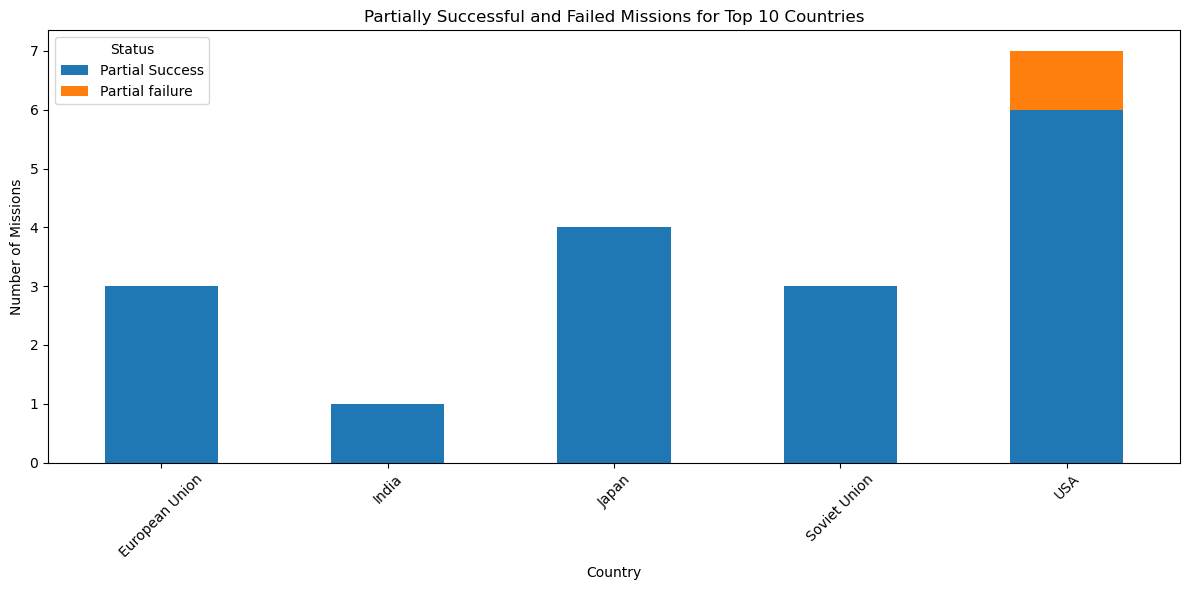

In [158]:
status_by_country.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Partially Successful and Failed Missions for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Status')
plt.show()

### Total Success and Failure By Year

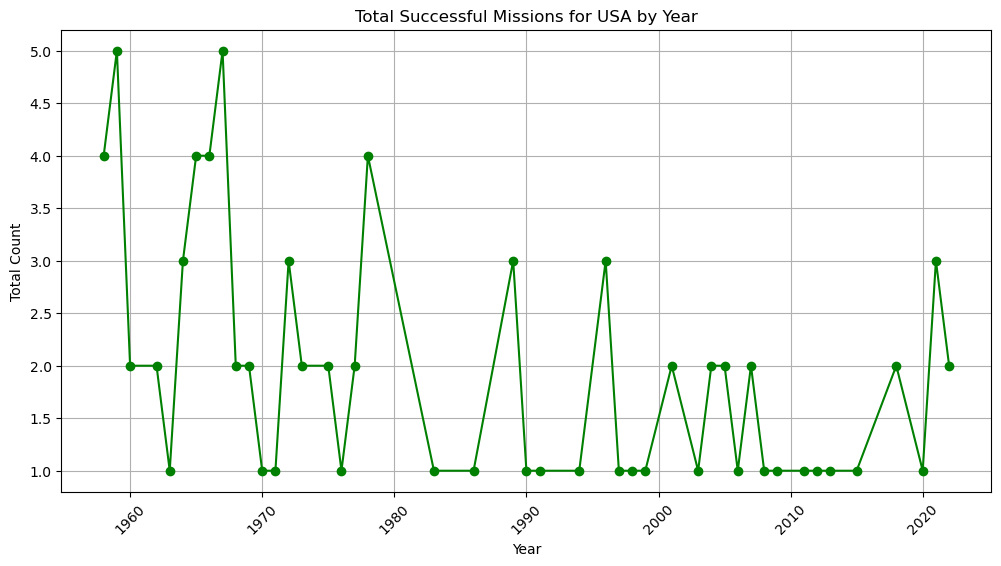

In [159]:
country = "USA"

successful_missions = filtered_data[(filtered_data['Status']=='Success')&(filtered_data['Origin']==country)]
success_by_year = successful_missions.groupby('Year').size()

plt.figure(figsize=(12, 6))
plt.plot(success_by_year.index, success_by_year.values, marker='o', linestyle='-', color='green')
plt.title(f"Total Successful Missions for {country} by Year")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [160]:
failure_missions = filtered_data[(filtered_data['Status']=='Failure')&(filtered_data['Origin']==country)]
failure_by_year = failure_missions.groupby('Year').size()
failure_by_year

Year
1957.0     1
1958.0    10
1959.0     5
1961.0     2
1962.0     3
1966.0     1
1967.0     1
1971.0     1
1980.0     1
1992.0     1
1998.0     1
1999.0     2
2002.0     1
2022.0     1
dtype: int64

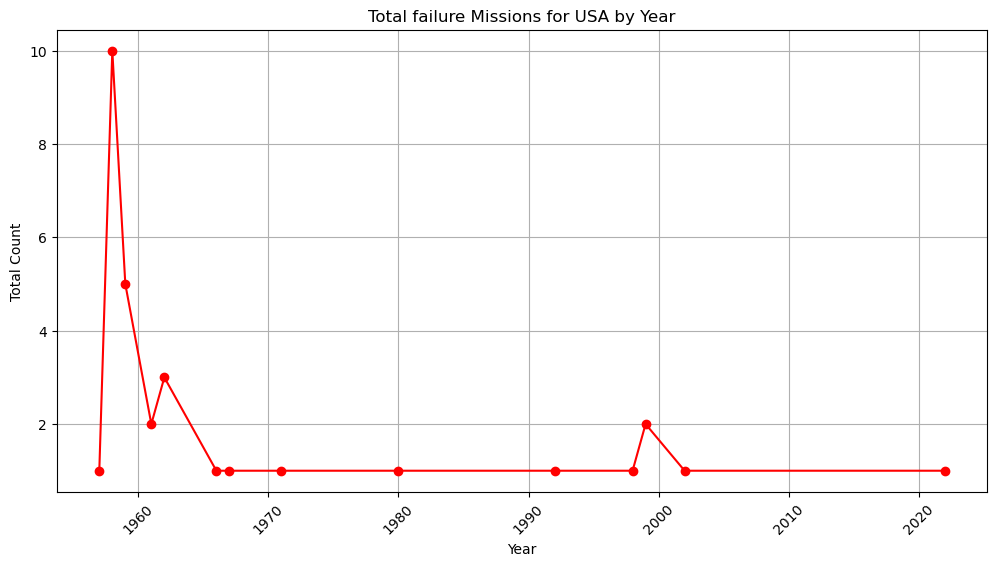

In [161]:
plt.figure(figsize=(12, 6))
plt.plot(failure_by_year.index,failure_by_year.values,marker='o',linestyle='-',color='red')
plt.title(f"Total failure Missions for {country} by Year")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Different Missions count On each Country

In [162]:
selected_origin = 'India'

selected_origin_data = filtered_data[filtered_data['Origin']==selected_origin]

specific_mission_counts = selected_origin_data['Name'].str.extract(r'([^- ]+)').value_counts().reset_index(name='Count')

specific_mission_counts = specific_mission_counts.rename(columns={'index': 'Mission Name', 'Count': 'Count of Missions'})

specific_mission_counts.columns = ['Mission Name','Count of Missions']

specific_mission_counts

,Mission Name,Count of Missions
0,GSAT,23
1,INSAT,19
2,IRNSS,9
3,IRS,8
4,EOS,6
5,CARTOSAT,5
6,INS,5
7,Rohini,4
8,RISAT,4
9,Cartosat,4


In [163]:
data = filtered_data

In [164]:
data.head(20)

,Year,Origin,Name,Motive,Status,Failure reason
9,1962.0,Canada,Alouette 1,Earth,Success,Nil
10,1965.0,Canada,Alouette 2,Earth,Success,Nil
11,1969.0,Canada,ISIS 1,Earth,Success,Nil
12,1971.0,Canada,ISIS 2,Earth,Success,Nil
13,2003.0,Canada,MOST,Earth,Success,Nil
14,2016.0,Canada,M3MSat,Earth,Success,Nil
15,2013.0,Canada,Sapphire,Earth,Success,Nil
16,2013.0,Canada,NEOSSat,Earth,Success,Nil
17,2013.0,Canada,CASSIOPE,Earth,Success,Nil
18,1976.0,Canada,Communications Technology Satellite,Earth,Success,Nil


Text(0, 0.5, 'Count')

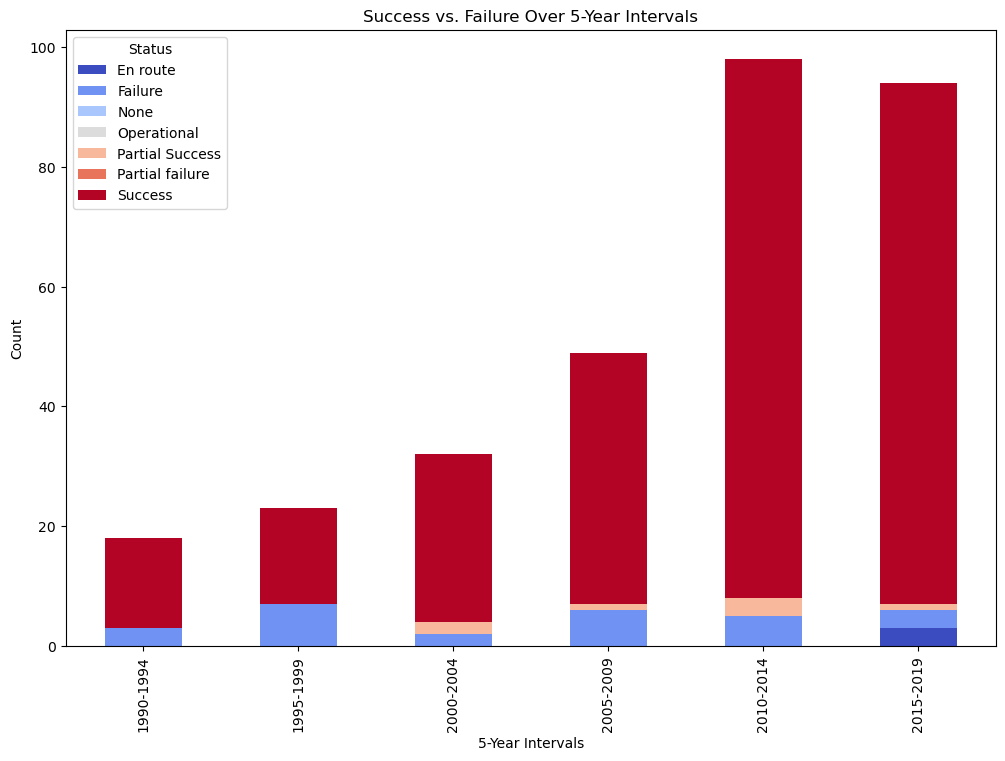

In [168]:
bins = list(range(1990, 2025, 5))  # Adjust as necessary for your data range
labels = [f'{b}-{b+4}' for b in bins[:-1]]
data['YearInterval'] = pd.cut(data['Year'], bins=bins, labels=labels, right=False)

# Group by these intervals and status
df_status_interval = data.groupby(['YearInterval', 'Status']).size().unstack().fillna(0)

# Plot the stacked bar chart
df_status_interval.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Success vs. Failure Over 5-Year Intervals')
plt.xlabel('5-Year Intervals')
plt.ylabel('Count')

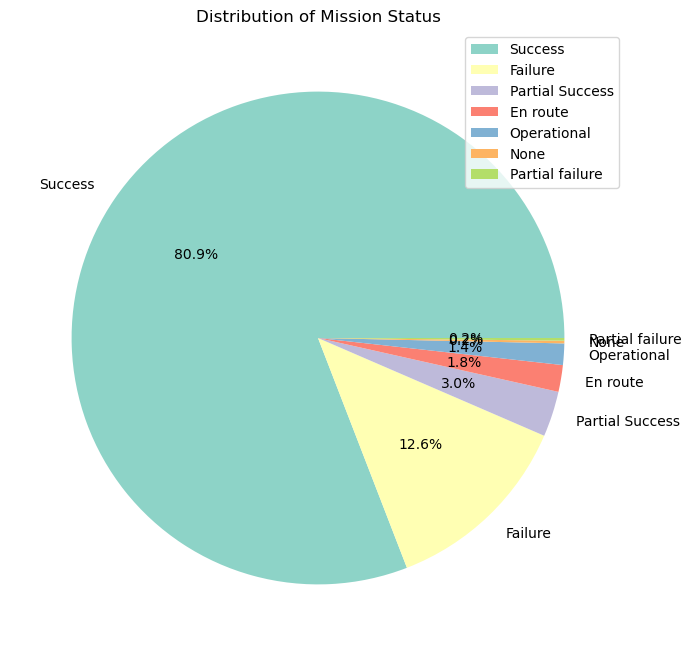

In [170]:
# Pie chart for Status distribution
plt.figure(figsize=(8, 8))
data['Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Mission Status')
plt.ylabel('')
plt.legend()
plt.show()

In [34]:
data['Status'].unique()

array(['Success', 'En route', 'Partial Success', 'Operational', 'Failure',
       'Partial failure', 'None'], dtype=object)

In [35]:
data['Status'].replace('None','No Result',inplace=True)

In [36]:
data['Status'].unique()

array(['Success', 'En route', 'Partial Success', 'Operational', 'Failure',
       'Partial failure', 'No Result'], dtype=object)

### My target column status is categorical. we need to convert it into numerical

In [37]:
le_status = LabelEncoder()
data['Status'] = le_status.fit_transform(data['Status'])

In [38]:
data['Status'].unique()

array([6, 0, 4, 3, 1, 5, 2])

In [39]:
status_mapping = dict(zip(le_status.classes_, le_status.transform(le_status.classes_)))
status_mapping

{'En route': 0,
 'Failure': 1,
 'No Result': 2,
 'Operational': 3,
 'Partial Success': 4,
 'Partial failure': 5,
 'Success': 6}

### Function to trim version numbers and keep the main names

In [40]:
import re
def trim_name(name):
    return re.split(r'\s+', name)[0]

In [41]:
filtered_data['Name'] = filtered_data['Name'].apply(trim_name)

In [42]:
def trim_to_name(name):
    # Ensure the name is a string
    if not isinstance(name, str):
        name = str(name)
    # Split the name at the first hyphen and take the first part
    trimmed_name = name.split('-')[0].strip()
    return trimmed_name

In [43]:
filtered_data['Name'] = filtered_data['Name'].apply(trim_to_name)

In [44]:
data

,Year,Origin,Name,Motive,Status,Failure reason
9,1962.0,Canada,Alouette,Earth,6,Nil
10,1965.0,Canada,Alouette,Earth,6,Nil
11,1969.0,Canada,ISIS,Earth,6,Nil
12,1971.0,Canada,ISIS,Earth,6,Nil
13,2003.0,Canada,MOST,Earth,6,Nil
...,...,...,...,...,...,...
609,1990.0,China,Fengyun,Sun,1,Launch Failure
610,2004.0,China,Fengyun,Geostationary,1,Launch Failure
611,1997.0,China,Fengyun,Geostationary,1,Launch Failure
612,2017.0,China,Shijian,Tele-communication,1,Launch Failure


### Features columns are changing into numerical columns

In [45]:
le_origin = LabelEncoder()
le_name = LabelEncoder()
le_motive = LabelEncoder()

data['Origin'] = le_origin.fit_transform(data['Origin'])
data['Name'] = le_name.fit_transform(data['Name'])
data['Motive'] = le_motive.fit_transform(data['Motive'])

In [46]:
data

,Year,Origin,Name,Motive,Status,Failure reason
9,1962.0,0,5,13,6,Nil
10,1965.0,0,5,13,6,Nil
11,1969.0,0,84,13,6,Nil
12,1971.0,0,84,13,6,Nil
13,2003.0,0,112,13,6,Nil
...,...,...,...,...,...,...
609,1990.0,1,57,42,1,Launch Failure
610,2004.0,1,57,20,1,Launch Failure
611,1997.0,1,57,20,1,Launch Failure
612,2017.0,1,166,44,1,Launch Failure


### Data Modeling

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [48]:
x = filtered_data[['Origin','Name','Motive']]
y = filtered_data[['Status']]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [50]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(456, 3) (456, 1)
(114, 3) (114, 1)


### Model 1 -> random forest


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [92]:
rf = RandomForestClassifier(random_state=3)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')


In [93]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [94]:
print("Best parameters found:")
print(grid_search_rf.best_params_)
print("********************************")
print("Best accuracy score:")
print(grid_search_rf.best_score_)

Best parameters found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
********************************
Best accuracy score:
0.8267797419971334


In [95]:
y_pred = grid_search_rf.predict(x_test)

In [96]:
y_pred[0:5]

array([6, 6, 6, 6, 6])

In [97]:
y_test[0:5]

,Status
310,1
532,6
462,6
538,6
366,6


In [98]:
accuracy_RF = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_RF:.2f}')

Accuracy: 0.79


In [99]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.10      0.17        21
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           6       0.79      1.00      0.88        88

    accuracy                           0.79       114
   macro avg       0.36      0.22      0.21       114
weighted avg       0.79      0.79      0.71       114



In [100]:
# Mapping dictionaries
origin_mapping = dict(zip(le_origin.classes_, le_origin.transform(le_origin.classes_)))
name_mapping = dict(zip(le_name.classes_, le_name.transform(le_name.classes_)))
motive_mapping = dict(zip(le_motive.classes_, le_motive.transform(le_motive.classes_)))

In [101]:
origin_mapping

{'Canada': 0,
 'China': 1,
 'European Union': 2,
 'France': 3,
 'India': 4,
 'Japan': 5,
 'Soviet Union': 6,
 'Turkey': 7,
 'UK': 8,
 'USA': 9}

In [102]:
name_mapping

{'APPLE': 0,
 'ASCA': 1,
 'Aditya': 2,
 'Akari': 3,
 'Akatsuki': 4,
 'Alouette': 5,
 'Anand': 6,
 'Apstar': 7,
 'Ariel': 8,
 'Artemis': 9,
 'Aryabhata': 10,
 'AsiaSat': 11,
 'Asterix': 12,
 'Astrosat': 13,
 'Aura': 14,
 'BDSAGR': 15,
 'Baoyun': 16,
 'Beacon': 17,
 'Beidou': 18,
 'BepiColombo': 19,
 'Bhaskara': 20,
 'BioSentinel': 21,
 'BİLSAT': 22,
 'CAPSTONE': 23,
 'CARE': 24,
 'CARTOSAT': 25,
 'CASSIOPE': 26,
 'CMS': 27,
 'COBE': 28,
 'CONTOUR': 29,
 'COROT': 30,
 'Cartosat': 31,
 'Cassini': 32,
 'Castor': 33,
 'Chandra': 34,
 'Chandrayaan': 35,
 'Clementine': 36,
 'Communications': 37,
 'Compton': 38,
 'Copernicus': 39,
 'Cosmos': 40,
 'CuSP': 41,
 'DART': 42,
 'DSCOVR': 43,
 'Danuri': 44,
 'Dawn': 45,
 'Deep': 46,
 'Diadème': 47,
 'Diapason': 48,
 'EDUSAT': 49,
 'EMISAT': 50,
 'EOS': 51,
 'EQUULEUS': 52,
 'EXOSAT': 53,
 'Euclid': 54,
 'ExoMars': 55,
 'Explorer': 56,
 'Fengyun': 57,
 'Fobos': 58,
 'GSAT': 59,
 'Gaofen': 60,
 'Genesis': 61,
 'Ginga': 62,
 'Giotto': 63,
 'Granat': 64,

In [103]:
motive_mapping

{'CAMSAT': 0,
 'CASC': 1,
 'CAST': 2,
 'CMA': 3,
 'Changchun': 4,
 'Climate': 5,
 'Comet': 6,
 'Communication': 7,
 'Communication,Navigation': 8,
 'DP107': 9,
 'Debris': 10,
 'Demonstration': 11,
 'Disaster': 12,
 'Earth': 13,
 'Earth ': 14,
 'Earth-Sun L1': 15,
 'Earth-Sun L2': 16,
 'Eros': 17,
 'Experimental': 18,
 'Geostationary': 19,
 'Geostationary ': 20,
 'Geosynchronous': 21,
 'Heliocentric': 22,
 'IOT': 23,
 'Jupiter': 24,
 'L2': 25,
 'Mars': 26,
 'Mercury': 27,
 'Moon': 28,
 'NRHO': 29,
 'Nanjing': 30,
 'Navigation': 31,
 'Neptune': 32,
 'None': 33,
 'Origin Space': 34,
 'Pluto': 35,
 'Saturn-Titan': 36,
 'Scientific Research': 37,
 'Shanghai': 38,
 'Space Environment': 39,
 'Space Science': 40,
 'Student Satellite': 41,
 'Sun': 42,
 'Tele-Communication': 43,
 'Tele-communication': 44,
 'Tsinghua': 45,
 'Unknown': 46,
 'Uranus': 47,
 'Venus': 48,
 'Vesta': 49,
 'Wuhan': 50,
 'Xinwei': 51,
 'ZeroG': 52,
 'asteroid': 53,
 'orbit': 54}

In [104]:
def encode_input(origin, name, motive):
    return [
        origin_mapping.get(origin, -1),  # -1 if the category is unknown
        name_mapping.get(name, -1),
        motive_mapping.get(motive, -1)
    ]

status_mapping = {
    0: 'En route',
    1: 'Failure',
    2: 'No Result',
    3: 'Operational',
    4: 'Partial Success',
    5: 'Partial failure',
    6: 'Success'
}

new_input = encode_input('China', 'AsiaSat', 'Tele-communication')

new_input_df = pd.DataFrame([new_input], columns=['Origin', 'Name', 'Motive'])

predicted_status = grid_search_rf.predict(new_input_df)[0]

predicted_status_string = status_mapping[predicted_status]

In [105]:
print("*************************************************************************************************")
print("*************************************************************************************************")
print("Predicted Outcome (Random Forest) :")
final_output = f"Based on the past dataset, we predicted the mission will become '{predicted_status_string}'."

print(final_output)

*************************************************************************************************
*************************************************************************************************
Predicted Outcome (Random Forest) :
Based on the past dataset, we predicted the mission will become 'Success'.


### Model 2 -> SVM 

In [106]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [107]:
svm = SVC(random_state=42)

In [108]:
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [109]:
grid_search_svm.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [110]:
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Best Score: {grid_search_svm.best_score_:.2f}")

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.82


In [111]:
best_svm = grid_search_svm.best_estimator_
y_pred = best_svm.predict(x_test)

In [112]:
accuracy_SVM = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_SVM:.2f}')

Accuracy: 0.80


In [113]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.14      0.24        21
           3       0.00      0.00      0.00         1
           4       1.00      0.33      0.50         3
           6       0.80      0.99      0.88        88

    accuracy                           0.80       114
   macro avg       0.51      0.29      0.32       114
weighted avg       0.78      0.80      0.74       114



In [114]:
def encode_input(origin, name, motive):
    return [
        origin_mapping.get(origin, -1),  # -1 if the category is unknown
        name_mapping.get(name, -1),
        motive_mapping.get(motive, -1)
    ]

status_mapping = {
    0: 'En route',
    1: 'Failure',
    2: 'No Result',
    3: 'Operational',
    4: 'Partial Success',
    5: 'Partial failure',
    6: 'Success'
}

new_input = encode_input('China', 'AsiaSat', 'Tele-communication')

new_input_df = pd.DataFrame([new_input], columns=['Origin', 'Name', 'Motive'])

predicted_status = grid_search_svm.predict(new_input_df)[0]

predicted_status_string = status_mapping[predicted_status]

In [115]:
print("*************************************************************************************************")
print("*************************************************************************************************")
print("Predicted Outcome (SVM) :")
final_output = f"Based on the past dataset, we predicted the mission will become '{predicted_status_string}'."

print(final_output)

*************************************************************************************************
*************************************************************************************************
Predicted Outcome (SVM) :
Based on the past dataset, we predicted the mission will become 'Success'.


### Model 3 -> Gradient Boosting

        * n_estimators -> number of boosting stages
        * learning_rate -> shrinkage
        * max_depth -> maximum depth of the individual estimators

In [116]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [117]:
gb = GradientBoostingClassifier(random_state=42)

In [118]:
grid_search_GB = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [119]:
grid_search_GB.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200]},
             verbose=2)

In [120]:
print(f"Best Parameters: {grid_search_GB.best_params_}")
print(f"Best Score: {grid_search_GB.best_score_:.2f}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Score: 0.82


In [121]:
best_gb = grid_search_GB.best_estimator_
y_pred = best_gb.predict(x_test)

In [122]:
accuracy_GB = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_GB:.2f}')

Accuracy: 0.78


In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.10      0.17        21
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           6       0.78      0.99      0.87        88

    accuracy                           0.78       114
   macro avg       0.30      0.18      0.17       114
weighted avg       0.79      0.78      0.71       114



In [124]:
def encode_input(origin, name, motive):
    return [
        origin_mapping.get(origin, -1),  # -1 if the category is unknown
        name_mapping.get(name, -1),
        motive_mapping.get(motive, -1)
    ]

status_mapping = {
    0: 'En route',
    1: 'Failure',
    2: 'No Result',
    3: 'Operational',
    4: 'Partial Success',
    5: 'Partial failure',
    6: 'Success'
}

new_input = encode_input('China', 'AsiaSat', 'Tele-communication')

new_input_df = pd.DataFrame([new_input], columns=['Origin', 'Name', 'Motive'])

predicted_status = grid_search_GB.predict(new_input_df)[0]

predicted_status_string = status_mapping[predicted_status]

In [125]:
print("*************************************************************************************************")
print("*************************************************************************************************")
print("Predicted Outcome (Gradient Boosting Classifier) :")
final_output = f"Based on the past dataset, we predicted the mission will become '{predicted_status_string}'."

print(final_output)

*************************************************************************************************
*************************************************************************************************
Predicted Outcome (Gradient Boosting Classifier) :
Based on the past dataset, we predicted the mission will become 'Success'.


### Model with Best Score

In [126]:
print(f" Random Forest Best Score: {grid_search_rf.best_score_:.2f}")
print(f" SVM Best Score: {grid_search_svm.best_score_:.2f}")
print(f" Gradient Boosting Best Score: {grid_search_GB.best_score_:.2f}")

 Random Forest Best Score: 0.83
 SVM Best Score: 0.82
 Gradient Boosting Best Score: 0.82


### Model with Best Accuracy

In [127]:
print("Random Forest :", accuracy_RF)
print("Support Vector Machine :", accuracy_SVM)
print("Gradient Boosting :",accuracy_GB)

Random Forest : 0.7894736842105263
Support Vector Machine : 0.7982456140350878
Gradient Boosting : 0.7807017543859649


In [174]:
if accuracy_SVM>accuracy_RF:
    print("Support Vector Machine Has the Highest Accuracy !")
elif accuracy_RF>accuracy_SVM:
    print("Random Forest Has the Highest Accuracy !")
else:
    print("Gradient Boosting Has the Highest Accuracy !")

Support Vector Machine Has the Highest Accuracy !


In [176]:
def encode_input(origin, name, motive):
    return [
        origin_mapping.get(origin, -1),  # -1 if the category is unknown
        name_mapping.get(name, -1),
        motive_mapping.get(motive, -1)
    ]

status_mapping = {
    0: 'En route',
    1: 'Failure',
    2: 'No Result',
    3: 'Operational',
    4: 'Partial Success',
    5: 'Partial failure',
    6: 'Success'
}

new_input = encode_input('China', 'AsiaSat', 'Tele-communication')

new_input_df = pd.DataFrame([new_input], columns=['Origin', 'Name', 'Motive'])

predicted_status = grid_search_svm.predict(new_input_df)[0]

predicted_status_string = status_mapping[predicted_status]

In [177]:
print("*************************************************************************************************")
print("*************************************************************************************************")
print("Predicted Outcome (SVM) :")
final_output = f"Based on the past dataset, we predicted the mission will become '{predicted_status_string}'."

print(final_output)

*************************************************************************************************
*************************************************************************************************
Predicted Outcome (SVM) :
Based on the past dataset, we predicted the mission will become 'Success'.
